In [151]:
import pandas as pd
import seaborn as sns

In [152]:
d=pd.read_csv('../datasets/datasets_final.csv')
d=d.rename(columns={'total_pageviews':'y'})

In [153]:
d['merged'] = d['seo_title'] + ['. '] + d['body']

In [154]:
d.groupby('channel').count().sort_values(by='id')

,id,seo_complexity,complexity,seo_veracity,veracity,seo_loaded,loaded,seo_mb,mb,seo_pers,...,subj2,publish_date_cest,subchannel,access_level,title,seo_title,intro,body,y,merged
channel,,,,,,,,,,,,,,,,,,,,,
Finanzen,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Unternehmen,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Fitness,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Partnerschaft,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
Backstage,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,35,37,37,37
Tests,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
Community,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,51,102,102,102
Dein SPIEGEL,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
Familie,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151


In [155]:
def mynorm(arr):
    return (arr-arr.min())/(arr.max() - arr.min())

In [156]:
df = d[d.channel.isin(['Ausland','Panorama','Politik','Wirtschaft'])]

In [159]:
df.y = mynorm(df.y)

/tmp/ipykernel_6813/2280856357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y = mynorm(df.y)


/tmp/ipykernel_6813/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

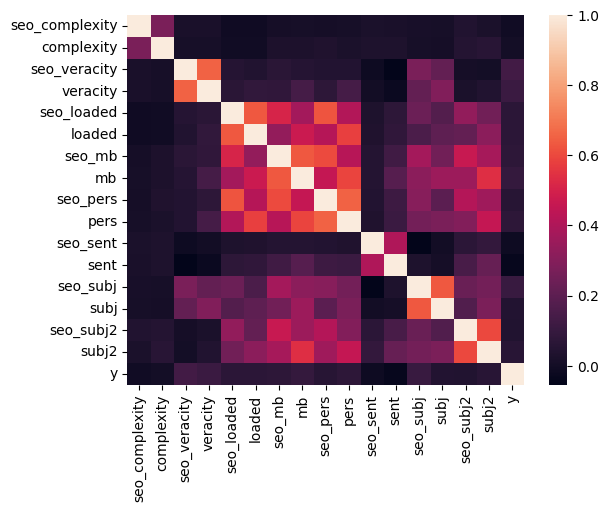

In [160]:
sns.heatmap(df.corr())

In [49]:
df_ble.to_csv('channels_regression.csv')

In [52]:
df_ble[['merged','id','total_pageviews','seo_title']].to_csv('channels_regression.csv')

# Different setups

## granularity

In [201]:
df = d[d.channel.isin(['Politik'])]

In [202]:
df['month'] = df.publish_date_cest.apply(lambda x: str(x)[5:7])
df['day'] = df.publish_date_cest.apply(lambda x: str(x)[:10])

/tmp/ipykernel_6813/3567126339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.publish_date_cest.apply(lambda x: str(x)[5:7])
/tmp/ipykernel_6813/3567126339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.publish_date_cest.apply(lambda x: str(x)[:10])


<AxesSubplot: xlabel='y', ylabel='Count'>

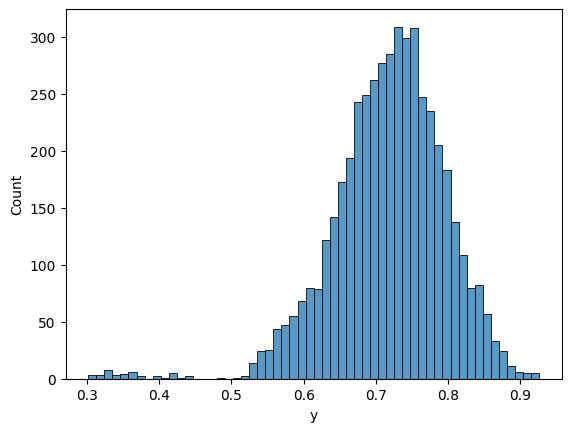

In [203]:
sns.histplot(df.y)

In [204]:
gbmp = df[df.access_level=='paid'].groupby(by='month').mean()
gbdp = df[df.access_level=='paid'].groupby(by='day').mean()
gbmf = df[df.access_level=='free'].groupby(by='month').mean()
gbdf = df[df.access_level=='free'].groupby(by='day').mean()

/tmp/ipykernel_6813/3422103927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gbmp = df[df.access_level=='paid'].groupby(by='month').mean()
/tmp/ipykernel_6813/3422103927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gbdp = df[df.access_level=='paid'].groupby(by='day').mean()
/tmp/ipykernel_6813/3422103927.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gbmf = df[df.access_level=='free'].groupby(by='mon

In [213]:
gbmf.corr().y.sort_values()

subj2            -0.414969
seo_pers         -0.355140
seo_sent         -0.212636
loaded           -0.119358
pers             -0.077413
seo_loaded       -0.058790
seo_subj2         0.092722
sent              0.128986
seo_complexity    0.183284
complexity        0.214123
seo_mb            0.308867
subj              0.353325
mb                0.448950
veracity          0.633206
seo_veracity      0.634135
seo_subj          0.760435
y                 1.000000
Name: y, dtype: float64

In [139]:
d['seo_persb'] = d.seo_pers.apply(lambda x: 1 if x >= 0.5 else 0)

<AxesSubplot: xlabel='day', ylabel='seo_bias_metric'>

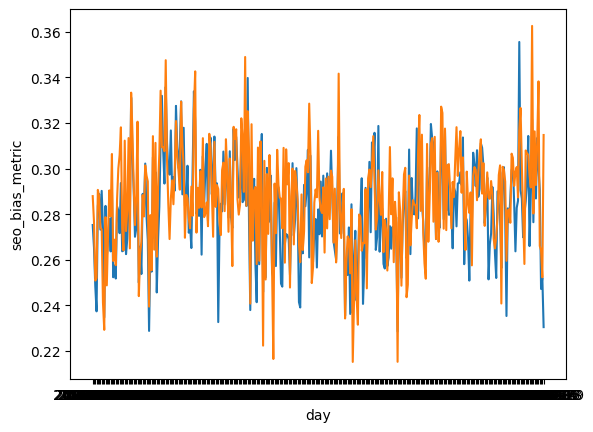

In [134]:
sns.lineplot(gbdf.seo_bias_metric)
sns.lineplot(gbdf.bias_metric)

In [95]:
mynorm(gbm.seo_pers)

SyntaxError: unmatched ')' (3675201764.py, line 1)

In [200]:
gbdf.corr().y.sort_values()

sent             -0.205258
seo_sent         -0.184491
subj2            -0.093769
seo_complexity   -0.054428
complexity       -0.016103
seo_pers         -0.014974
pers             -0.010731
seo_mb            0.014298
seo_veracity      0.026136
veracity          0.035855
seo_subj2         0.053971
seo_loaded        0.067603
loaded            0.081761
subj              0.097460
mb                0.180676
seo_subj          0.213238
y                 1.000000
Name: y, dtype: float64

<AxesSubplot: xlabel='month', ylabel='seo_veracity'>

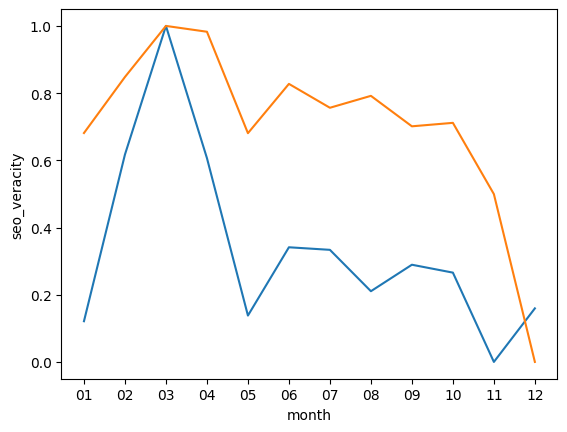

In [198]:
sns.lineplot(mynorm(gbmp.seo_veracity))
sns.lineplot(mynorm(gbmp.y))

In [194]:
mynorm(gbmf.seo_pers)

month
01    0.195300
02    0.337975
03    0.011586
04    0.489315
05    0.000000
06    0.236378
07    0.342827
08    0.081583
09    0.663052
10    0.425656
11    0.708368
12    1.000000
Name: seo_pers, dtype: float64

In [111]:
d.columns

Index(['id', 'seo_complexity', 'complexity', 'seo_veracity', 'veracity',
       'seo_loaded', 'loaded', 'seo_mb', 'mb', 'seo_pers', 'pers', 'seo_sent',
       'sent', 'seo_subj', 'subj', 'seo_subj2', 'subj2', 'publish_date_cest',
       'channel', 'subchannel', 'access_level', 'title', 'seo_title', 'intro',
       'body', 'total_pageviews', 'merged', 'month', 'day'],
      dtype='object')

In [121]:
d['seo_bias_metric']=d[['seo_loaded','seo_subj','seo_mb','seo_pers','seo_veracity']].mean(axis=1)
d['bias_metric']=d[['loaded','subj','mb','pers','veracity']].mean(axis=1)

In [115]:
d[['seo_loaded','seo_subj','seo_mb','seo_pers','seo_veracity']]

,seo_loaded,seo_subj,seo_mb,seo_pers,seo_veracity
0,0.068942,0.175243,0.085282,0.015333,0.032976
1,0.030843,0.902161,0.748440,0.155210,0.264698
2,0.031610,0.977934,0.114551,0.027312,0.870619
3,0.078862,0.496455,0.077697,0.127835,0.318670
4,0.830061,0.887599,0.818541,0.773270,0.058037
...,...,...,...,...,...
38016,0.048458,0.896239,0.115656,0.019968,0.458470
38017,0.046872,0.984778,0.884383,0.459687,0.453614
38018,0.038300,0.177271,0.898705,0.029407,0.632459
38019,0.075290,0.913414,0.114808,0.023346,0.937866


,id,seo_complexity,complexity,seo_veracity,veracity,seo_loaded,loaded,seo_mb,mb,seo_pers,...,seo_title,intro,body,y,merged,month,day,seo_bias_metric,bias_metric,seo_persb
0,4353f27e-12ab-4747-958b-54699b97f661,0.0,0.0,0.032976,0.127198,0.068942,0.115538,0.085282,0.111585,0.015333,...,Hofbräuhaus in München geht gegen Dresdener Ho...,Das Hofbräuhaus in München sieht seine Markenr...,Im Namensstreit Hofbräuhaus gegen Hofbrauhaus ...,0.718944,Hofbräuhaus in München geht gegen Dresdener Ho...,02,2022-02-22,0.075555,0.134645,0
1,f5ce0b3b-d0fc-471a-8a02-8f255d408bf9,0.0,0.0,0.264698,0.171489,0.030843,0.045127,0.748440,0.928328,0.155210,...,»Bild«-Chef Johannes Boie: Der Anti-Reichelt,Nach dem Rauswurf von Julian Reichelt sollte J...,"Es sieht aus, als wäre er nur zur Zwischenmiet...",0.797445,»Bild«-Chef Johannes Boie: Der Anti-Reichelt. ...,10,2022-10-21,0.420271,0.392734,0
2,bab040f4-08eb-491d-97c4-82930b2c33c6,0.0,0.0,0.870619,0.774385,0.031610,0.031367,0.114551,0.978317,0.027312,...,China: Das steht im vertraulichen Strategiepap...,China verletzt massiv Menschenrechte und gewin...,Ein einheitlicher Kurs gegenüber China – das w...,0.796070,China: Das steht im vertraulichen Strategiepap...,11,2022-11-16,0.404405,0.650460,0
3,66f37fec-1811-4672-8b2b-0278338d2b85,0.0,0.0,0.318670,0.882328,0.078862,0.064632,0.077697,0.400705,0.127835,...,Veronika Grimm über Vorziehen der Preisbremse:...,"Die Politik erwägt, die für Frühjahr geplante ...","Die bisherigen Vorstöße, die Menschen von den ...",0.632964,Veronika Grimm über Vorziehen der Preisbremse:...,11,2022-11-04,0.219904,0.298846,0
4,e2e79f5a-5d6f-46d3-a9d5-375014ab393b,0.0,0.0,0.058037,0.038601,0.830061,0.068286,0.818541,0.931591,0.773270,...,WM 2022: Die Szenarien der Hölle im Spiel Deut...,"Kommen wir automatisch ins Achtelfinale, wenn ...","Ich habe den Überblick verloren, und ich bin s...",0.708653,WM 2022: Die Szenarien der Hölle im Spiel Deut...,12,2022-12-01,0.673502,0.489463,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38016,19df723f-67cd-4bb5-97d7-8b5f0b0f580e,0.0,0.0,0.458470,0.144466,0.048458,0.066242,0.115656,0.945375,0.019968,...,Görlitz: Prozess um Tod eines Irakers auf dem ...,Der belarussische Diktator Lukaschenko hat Flü...,"Sie kauern hinten im Laderaum, mit dem Rücken ...",0.705889,Görlitz: Prozess um Tod eines Irakers auf dem ...,05,2022-05-08,0.307758,0.298891,0
38017,ddcbbc3b-2d6b-4d11-a085-83afef9e159a,0.0,0.0,0.453614,0.467357,0.046872,0.049965,0.884383,0.677615,0.459687,...,Aiman al-Sawahiri: Der Tod des obersten Ideologen,Sie schlugen in einem luxuriösen Kabuler Wohnh...,Als die Nachbarn um 6.18 Uhr früh am Sonntagmo...,0.811115,Aiman al-Sawahiri: Der Tod des obersten Ideolo...,08,2022-08-02,0.565867,0.321930,0
38018,feaefd74-2d1b-410f-9184-e9a2583bef24,0.0,0.0,0.632459,0.533539,0.038300,0.032506,0.898705,0.900829,0.029407,...,­Märtha Louise: Esoterik-Prinzessin,NaN,Die Tochter des norwegischen Königs hält schon...,0.702455,­Märtha Louise: Esoterik-Prinzessin. Die Tocht...,06,2022-06-10,0.355228,0.423648,0
38019,9bc76511-2997-4b37-81e4-cb41ccf4e0c6,0.0,0.0,0.937866,0.910693,0.075290,0.045206,0.114808,0.246309,0.023346,...,Ukraine-Krieg: EU will neue russische Pässe fü...,"Der EU-Außenbeauftragte, Josep Borrell, hat di...",Die Europäische Union droht Ukrainerinnen und ...,0.733035,Ukraine-Krieg: EU will neue russische Pässe fü...,07,2022-07-13,0.412945,0.421701,0


In [149]:
d[d.access_level=='free'].total_pageviews

0        0.718944
3        0.632964
4        0.708653
5        0.697191
7        0.734871
           ...   
38014    0.688593
38015    0.783639
38018    0.702455
38019    0.733035
38020    0.697610
Name: total_pageviews, Length: 27354, dtype: float64

In [168]:
import numpy as np

In [175]:
mynorm(np.log([1,23,1222,42323,3232323]))

array([0.        , 0.20919038, 0.47423984, 0.7107406 , 1.        ])

# Datasets

In [215]:
d.columns

Index(['id', 'seo_complexity', 'complexity', 'seo_veracity', 'veracity',
       'seo_loaded', 'loaded', 'seo_mb', 'mb', 'seo_pers', 'pers', 'seo_sent',
       'sent', 'seo_subj', 'subj', 'seo_subj2', 'subj2', 'publish_date_cest',
       'channel', 'subchannel', 'access_level', 'title', 'seo_title', 'intro',
       'body', 'y', 'merged'],
      dtype='object')

In [216]:
d = d[['id','channel','subchannel','access_level','title','seo_title','body','merged','y']]

# All topics

In [224]:
d['y'].describe()

count    38021.000000
mean         0.710313
std          0.083615
min          0.000000
25%          0.662393
50%          0.713360
75%          0.765315
max          1.000000
Name: y, dtype: float64

In [262]:
def remove_outliers(d):
    cols = ['y'] # one or more

    Q1 = d[cols].quantile(0.25)
    Q3 = d[cols].quantile(0.75)
    IQR = Q3 - Q1

    d = d[~((d[cols] < (Q1 - 2 * IQR)) |(d[cols] > (Q3 + 2 * IQR))).any(axis=1)]
    d['y'] = mynorm(d.y)
    return d

In [263]:
d = remove_outliers(d)

/tmp/ipykernel_6813/3002435062.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['y'] = mynorm(d.y)


### free and paid, all topics

'/home/tomas/Documents/MBG/projects/spiegel_project/spiegel_performance/sp-project/notebooks'

In [301]:
d.to_csv('../datasets/all_all_regression.csv')

In [303]:
fre = d[d.access_level=='free']
fre['y'] = mynorm(fre.y)
fre.to_csv('../datasets/all_free_regression.csv')

/tmp/ipykernel_6813/2145569639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fre['y'] = mynorm(fre.y)


In [304]:
paid = d[d.access_level=='paid']
paid['y'] = mynorm(paid.y)
paid.to_csv('../datasets/all_paid_regression.csv')

/tmp/ipykernel_6813/2366772708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['y'] = mynorm(paid.y)


In [308]:
d.y.describe()

count    37636.000000
mean         0.502408
std          0.148909
min          0.000000
25%          0.405210
50%          0.503654
75%          0.604366
max          1.000000
Name: y, dtype: float64

In [307]:
def split(num):
    if num <= 0.40521:
        return 0
    elif num > 0.40521 and num <= 0.604366:
        return 1
    elif num > 0.604366:
        return 2
    else:
        print("Err")

0.4052101079731794

In [295]:
mynorm(d[d.access_level=='paid'].y).describe()

count    8474.000000
mean        0.535116
std         0.161833
min         0.000000
25%         0.434681
50%         0.543118
75%         0.649413
max         1.000000
Name: y, dtype: float64

In [296]:
mynorm(d[d.access_level=='free'].y).describe()

count    27246.000000
mean         0.498492
std          0.151493
min          0.000000
25%          0.398135
50%          0.497323
75%          0.602048
max          1.000000
Name: y, dtype: float64